# _`expression`_.`derived_term(`_`algo`_`="expansion", `_`lazy`_`=False,  `_`deterministic`_`=False, `_`breaking`_`=False)`

Generate the derived-term automaton from an expression.

The arguments are:
- `algo`:
  - `"derivation"`: rely on the `expression.derivation`.
  - `"expansion"`: rely on the `expression.expansion`.
- `lazy`: whether to build the result lazily, on the fly
- `deterministic`: whether to build a deterministic automaton.
- `breaking`: `split` the polynomials at each step

Preconditions:
- derivation-based algorithms require a free labelset (e.g., word labels are not supported)
- `deterministic` might not terminate on some expressions (in which case consider `lazy`)
- expressions with complement operators might not terminate either

Also known as:
- Antimirov automaton
- equation automaton
- partial-derivatives automaton

See also:
- [_expression_.automaton](expression.automaton.ipynb)
- [_expression_.constant_term](expression.constant_term.ipynb)
- [_expression_.derivation](expression.derivation.ipynb)
- [_expression_.expansion](expression.expansion.ipynb)

References:
- [antimirov.1996.tcs](References.ipynb#antimirov.1996.tcs) introduces the concept of derived-term automaton
- [lombardy.2005.tcs](References.ipynb#lombardy.2005.tcs) defines the derived-term construction for weighted automata (and coins the name "derived-term").
- [angrand.2010.jalc](References.ipynb#angrand.2010.jalc) defines its breaking variant
- [demaille.2016.ictac](References.ipynb#demaille.2016.ictac) introduces support for conjunction and complement

## Examples

### Classical Expressions

In the classical case (labels are letters, and weights are Boolean), this is the construct as described by Antimirov.

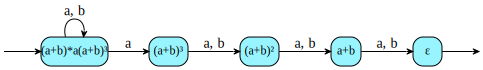

In [1]:
import vcsn
bexp = vcsn.B.expression
r = bexp('[ab]*a[ab]{3}')
a = r.derived_term()
a

The states of the resulting automaton are decorated by their expressions.  This can be stripped:

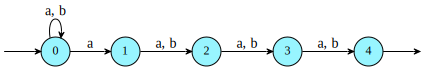

In [2]:
a.strip()

The result does not depend on the core computation: expansions and derivations compute the same terms:

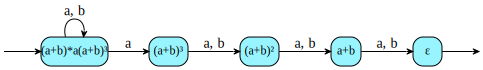

In [3]:
r.derived_term('derivation')

### Deterministic Automata
Alternatively, one can request a deterministic result:

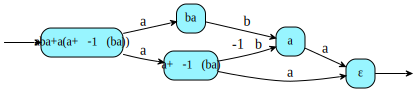

In [4]:
qexp = vcsn.Q.expression
r = qexp('aba+a(a+<-1>ba)')
nfa = r.derived_term()
nfa

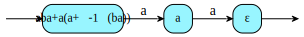

In [5]:
dfa = r.derived_term(deterministic=True)
dfa

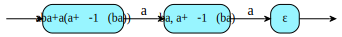

In [6]:
nfa.determinize()

### Extended Rational Expressions

Extended expressions are supported.  For instance, words starting with `a`s and then `b`s, but not exactly `ab`:

In [7]:
e = bexp('a*b* & (ab){c}')
e

a*b*&(ab)ᶜ

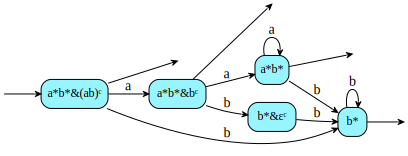

In [8]:
a = e.derived_term()
a

In [9]:
a.shortest(10)

ε ⊕ a ⊕ b ⊕ aa ⊕ bb ⊕ aaa ⊕ aab ⊕ abb ⊕ bbb ⊕ aaaa

### Weighted Expressions

The following example is taken from [lombardy.2005.tcs](References.ipynb#lombardy.2005.tcs):

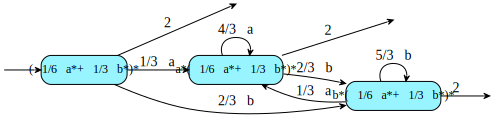

In [10]:
r = qexp('(<1/6>a*+<1/3>b*)*')
r.derived_term()

### Multitape Expressions
Since both expansions and derivatives in Vcsn support the tuple operator, both flavors of `derived_term` can be used to build a multitape automaton from a multitape expression.  For instance:

In [11]:
c = vcsn.context('[...] x [...] -> q')
c

[...]? × [...]? → ℚ

In [12]:
e = c.expression('(a{+}|x + b{+}|y)*')
e

(aa*|x+bb*|y)*

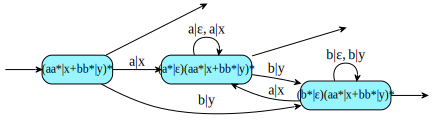

In [13]:
e.derived_term('expansion')

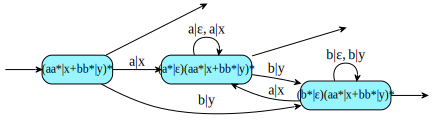

In [14]:
e.derived_term('derivation')

### Broken derived-term automaton

"Breaking" variants of derivation and expansion "split" the polynomials at each step.  In short, it means that no state will be labeled by an addition: rather the addition is split into several states.  As a consequence, the automaton might have several initial states.

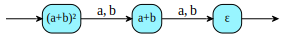

In [15]:
r = qexp('[ab]{2}')
r.derived_term()

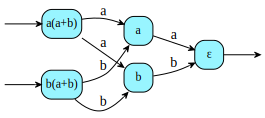

In [16]:
r.derived_term(breaking=True)

### Lazy construction
The derived-term automaton can be built on-the-fly, on-demand: states are uncovered on needed (e.g., when traversed by an evaluation).  This is especially useful when considering an expression on which the process does not terminate (i.e., would generate an "infinite" automaton).

In [17]:
r = qexp('a*+b*'); r

a*+b*

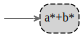

In [18]:
a = r.derived_term(lazy=True)
a

2


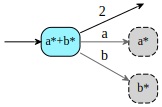

In [19]:
print(a('')); a

1


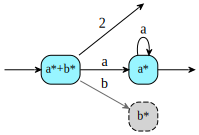

In [20]:
print(a('a')); a

1


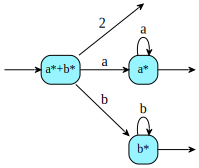

In [21]:
print(a('b')); a

The following expression does not admit a (finite) deterministic automaton (and determinizing the non-deterministic derived-term automaton would not terminate either).  Repeatedly calling the evaluation uncovers portions of an "infinite" deterministic automaton.

In [22]:
r = qexp('a*+(<2>a)*'); r

a*+(⟨2⟩a)*

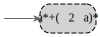

In [23]:
a = r.derived_term(deterministic=True, lazy=True)
a

2


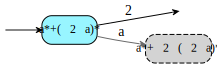

In [24]:
print(a('')); a

3


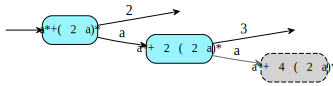

In [25]:
print(a('a')); a

9


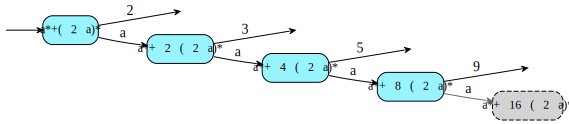

In [26]:
print(a('aaa')); a

Note that lazy determinization is also available: see [_automaton_.determinize](automaton.determinize.ipynb) to see the corresponding example.

Since it entails a "local" determinization ("under" the complement operator), the algorithm fails would not terminate.

In [27]:
r = r.complement()
r

(a*+(⟨2⟩a)*)ᶜ

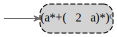

In [28]:
a = r.derived_term(lazy=True)
a

0


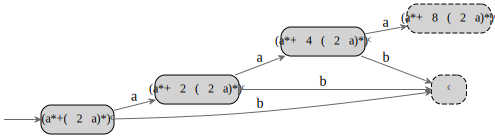

In [29]:
print(a('aa')); a

1


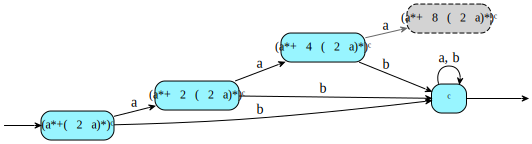

In [30]:
print(a('b')); a